 LCMO_PLD2_HALL_300K

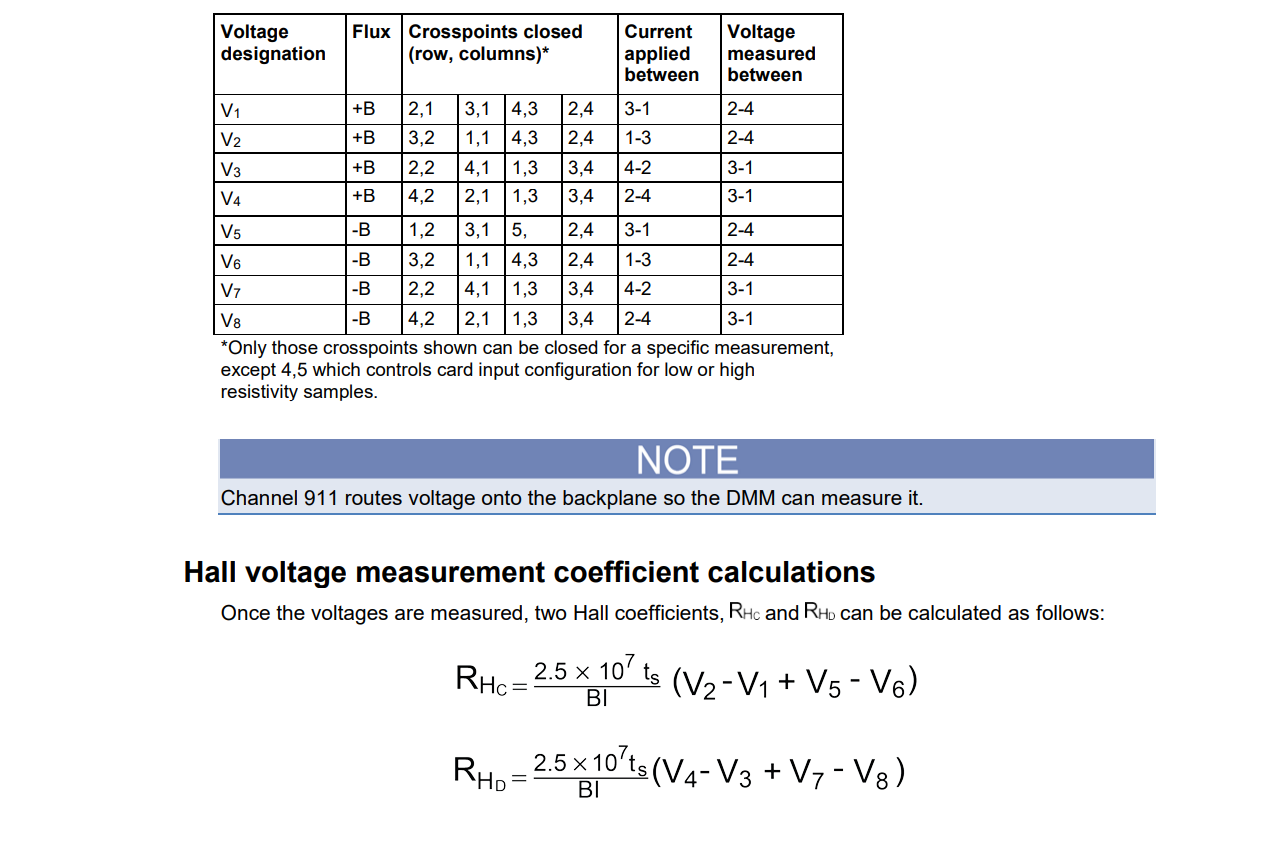

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
filename='C:\\users\\Admin\\Desktop\\Analysis\\Plots\\LCMO_PLD2\\HALL\\LCMO_PLD2_200K_HALL_+5T_to_-5T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])

df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

I             B           T           V1            V2  \
0    0.000001  50000.169141  200.229291  57724.03023 -186180.89738   
1    0.000001  49000.258594  200.350134  58592.08667 -189974.53992   
2    0.000001  48000.435547  200.368237  56945.56440 -194145.45696   
3    0.000001  47000.349609  200.361129  57129.64577 -198670.76309   
4    0.000001  46000.368945  200.313277  56339.77587 -202965.36426   
..        ...           ...         ...          ...           ...   
197  0.000001  46000.394922  199.995470  58089.23960 -203339.23898   
198  0.000001  47000.401367  199.994281  58471.90753 -199686.89109   
199  0.000001  48000.488086  200.003055  58638.56289 -195472.29693   
200  0.000001  49000.291406  200.000923  59203.12242 -190880.56807   
201  0.000001  50000.433203  200.001226  59307.66669 -186345.19334   

               V3            V4  Rel_value  multiplier  
0   -113375.74708   98594.81242  -0.003397   1000000.0  
1   -112185.54810  100150.13331  -0.003562   1000000.0  
2   -110043.08366  101825.57131  -0.003730   1000000.0  
3   -107718.21822  103447.10900  -0.003746   1000000.0  
4   -105934.80360  105404.67265  -0.003792   1000000.0  
..            ...           ...        ...         ...  
197 -109742.60269  107554.38698  -0.003631   1000000.0  
198 -111623.80430  105802.77570  -0.003787   1000000.0  
199 -112954.61623  103648.52128  -0.003468   1000000.0  
200 -114138.55221  102422.90028  -0.003583   1000000.0  
201 -114756.66905  100690.62358  -0.003523   1000000.0  

[202 rows x 9 columns]

In [3]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [4]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [5]:
df.head()

I             B  B_int           T           V1            V2  \
0  0.000001  50000.169141  50000  200.229291 -57724.03023  186180.89738   
1  0.000001  49000.258594  49000  200.350134 -58592.08667  189974.53992   
2  0.000001  48000.435547  48000  200.368237 -56945.56440  194145.45696   
3  0.000001  47000.349609  47000  200.361129 -57129.64577  198670.76309   
4  0.000001  46000.368945  46000  200.313277 -56339.77587  202965.36426   

             V3            V4  Rel_value  multiplier  
0  113375.74708  -98594.81242  -0.003397   1000000.0  
1  112185.54810 -100150.13331  -0.003562   1000000.0  
2  110043.08366 -101825.57131  -0.003730   1000000.0  
3  107718.21822 -103447.10900  -0.003746   1000000.0  
4  105934.80360 -105404.67265  -0.003792   1000000.0

In [6]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

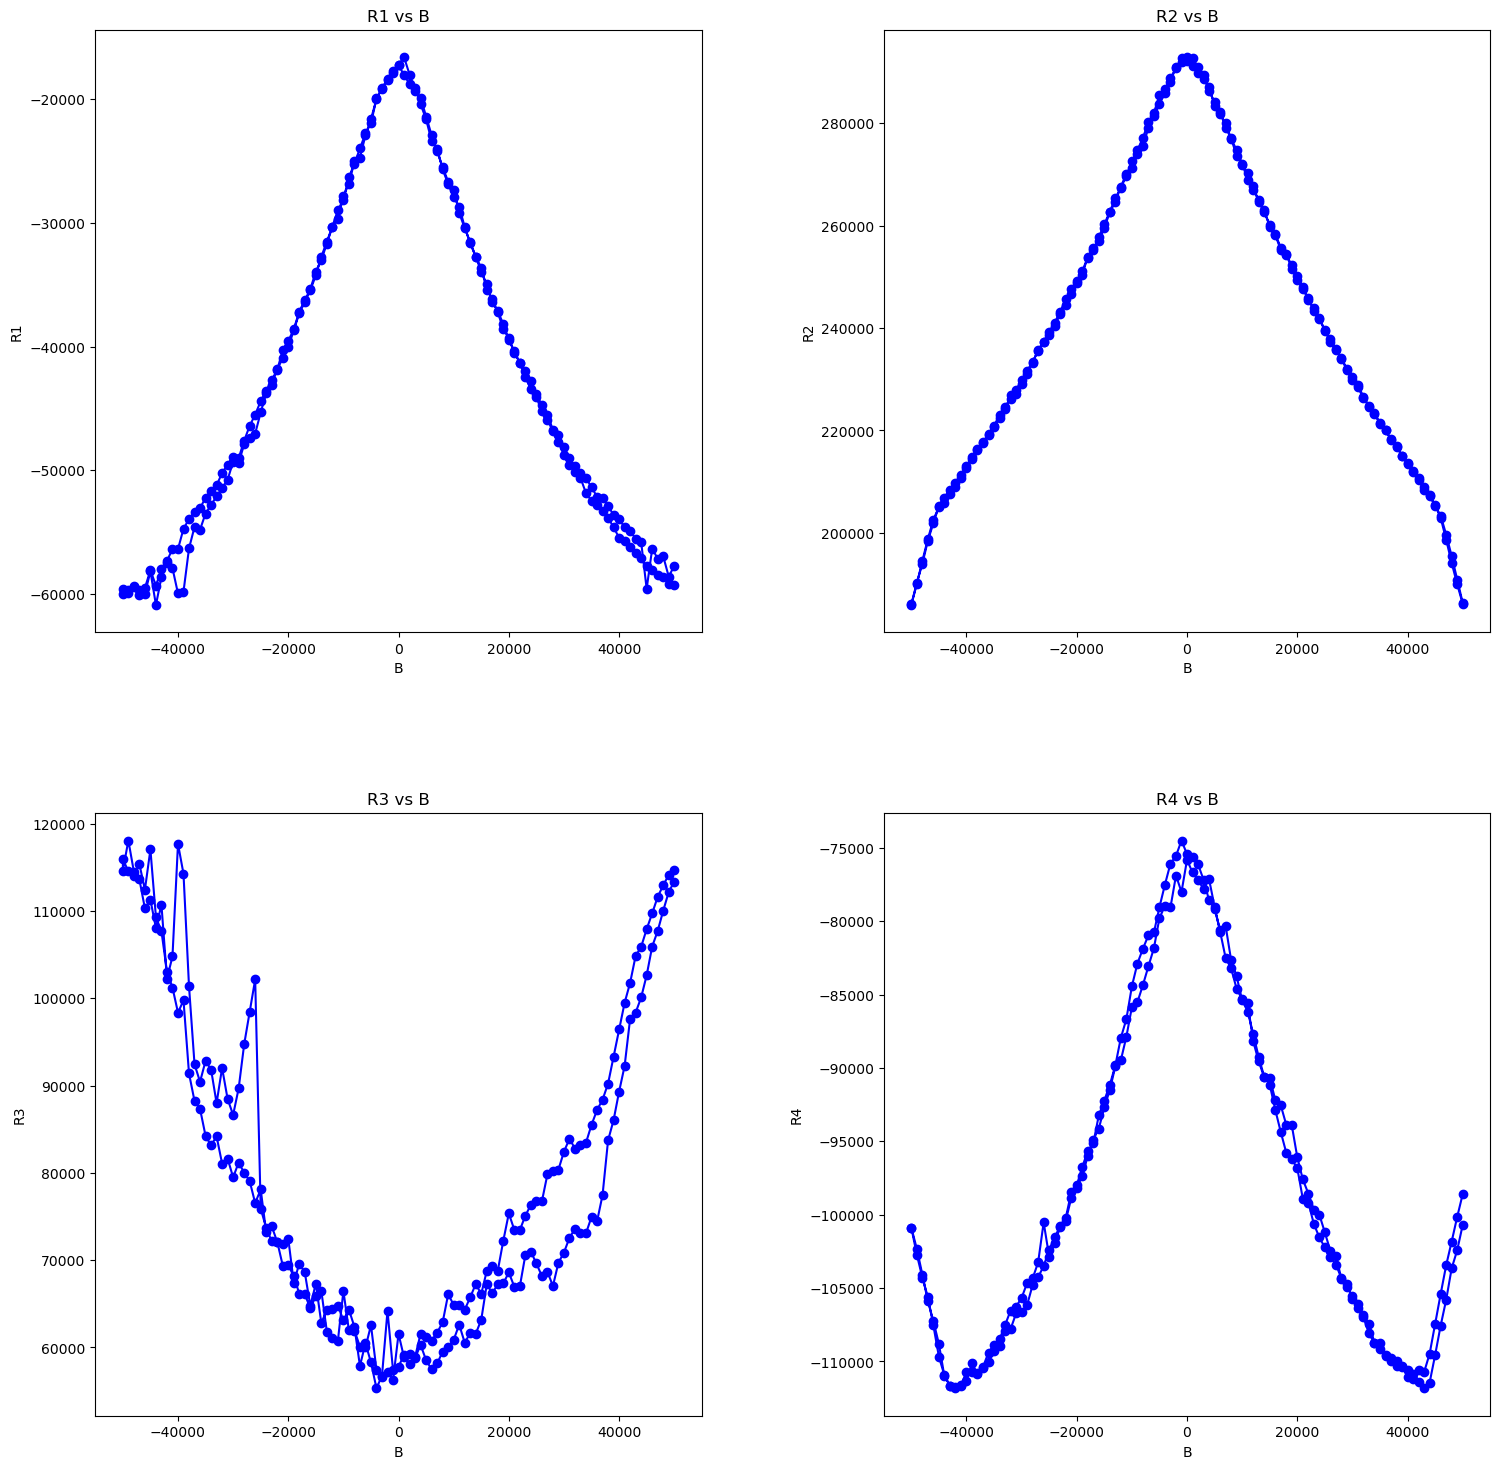

In [7]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [8]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [9]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

100

In [10]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [11]:
df_dec.head()

I             B  B_int           T           V1            V2  \
0  0.000001  50000.169141  50000  200.229291 -57724.03023  186180.89738   
1  0.000001  49000.258594  49000  200.350134 -58592.08667  189974.53992   
2  0.000001  48000.435547  48000  200.368237 -56945.56440  194145.45696   
3  0.000001  47000.349609  47000  200.361129 -57129.64577  198670.76309   
4  0.000001  46000.368945  46000  200.313277 -56339.77587  202965.36426   

             V3            V4  Rel_value  multiplier  
0  113375.74708  -98594.81242  -0.003397   1000000.0  
1  112185.54810 -100150.13331  -0.003562   1000000.0  
2  110043.08366 -101825.57131  -0.003730   1000000.0  
3  107718.21822 -103447.10900  -0.003746   1000000.0  
4  105934.80360 -105404.67265  -0.003792   1000000.0

In [12]:
df_inc.head()

I             B  B_int           T           V1            V2  \
101  0.000001 -50000.513672 -50000  199.994921 -59611.01347  186086.52121   
102  0.000001 -49000.231445 -49000  199.995790 -59694.80549  190249.92277   
103  0.000001 -48000.472266 -48000  199.995821 -59352.37528  193980.99122   
104  0.000001 -47000.420508 -47000  199.994616 -59655.95594  198470.98790   
105  0.000001 -46000.313477 -46000  199.992799 -59979.79392  201924.59318   

               V3            V4  Rel_value  multiplier  
101  114647.06846 -100880.04734  -0.003543   1000000.0  
102  118086.76310 -102721.48250  -0.003520   1000000.0  
103  114520.89173 -104279.26006  -0.003576   1000000.0  
104  113632.23262 -105611.07308  -0.003610   1000000.0  
105  110310.75525 -107547.92692  -0.003748   1000000.0

In [13]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [14]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

I      B           T           V1            V2            V3  \
0  0.000001  50000  200.229291 -57724.03023  186180.89738  113375.74708   
1  0.000001  49000  200.350134 -58592.08667  189974.53992  112185.54810   
2  0.000001  48000  200.368237 -56945.56440  194145.45696  110043.08366   
3  0.000001  47000  200.361129 -57129.64577  198670.76309  107718.21822   
4  0.000001  46000  200.313277 -56339.77587  202965.36426  105934.80360   

             V4           V5            V6            V7            V8  \
0  -98594.81242 -59611.01347  186086.52121  114647.06846 -100880.04734   
1 -100150.13331 -59694.80549  190249.92277  118086.76310 -102721.48250   
2 -101825.57131 -59352.37528  193980.99122  114520.89173 -104279.26006   
3 -103447.10900 -59655.95594  198470.98790  113632.23262 -105611.07308   
4 -105404.67265 -59979.79392  201924.59318  110310.75525 -107547.92692   

   multiplier  
0   1000000.0  
1   1000000.0  
2   1000000.0  
3   1000000.0  
4   1000000.0

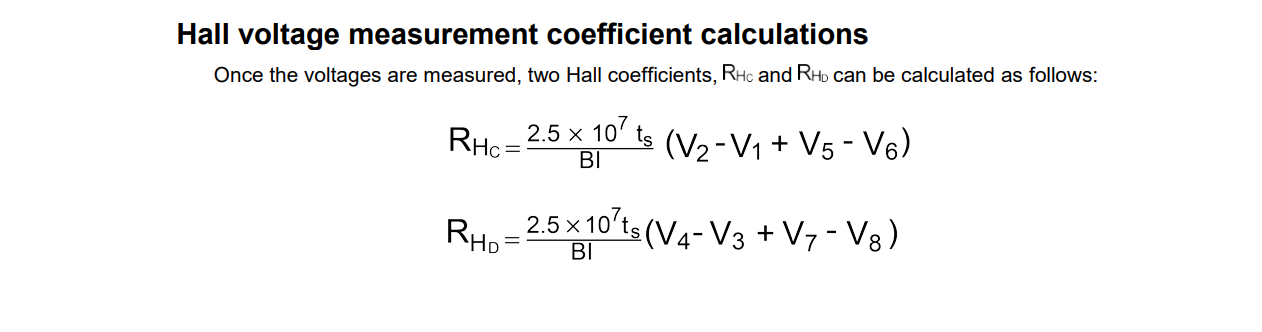
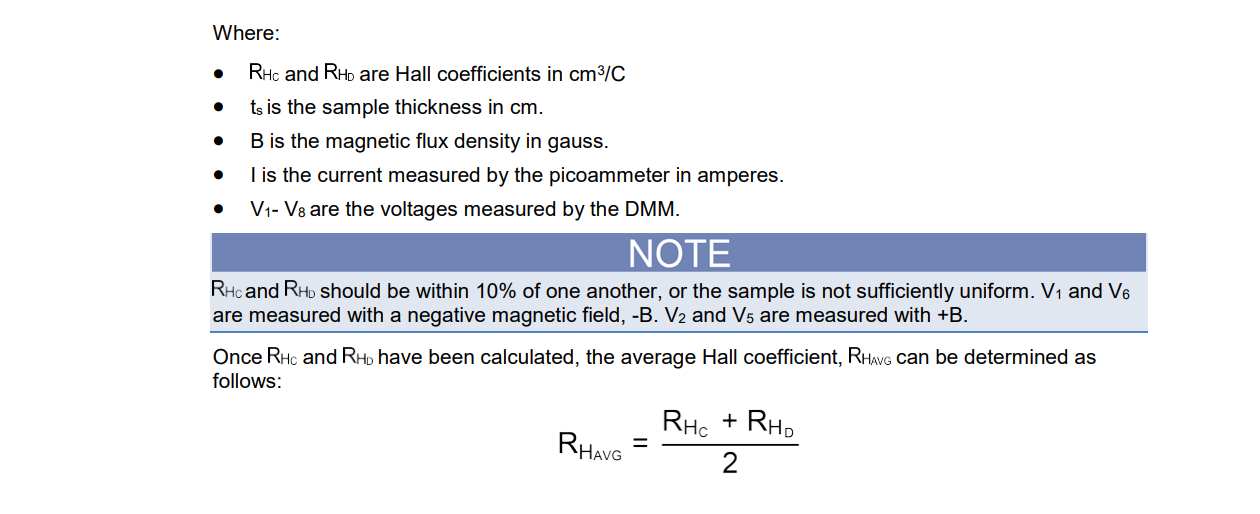

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [15]:
data['RHc'] = (-data['V2'] + data['V1'] - data['V5'] + data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (-data['V4'] + data['V3'] - data['V7'] + data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

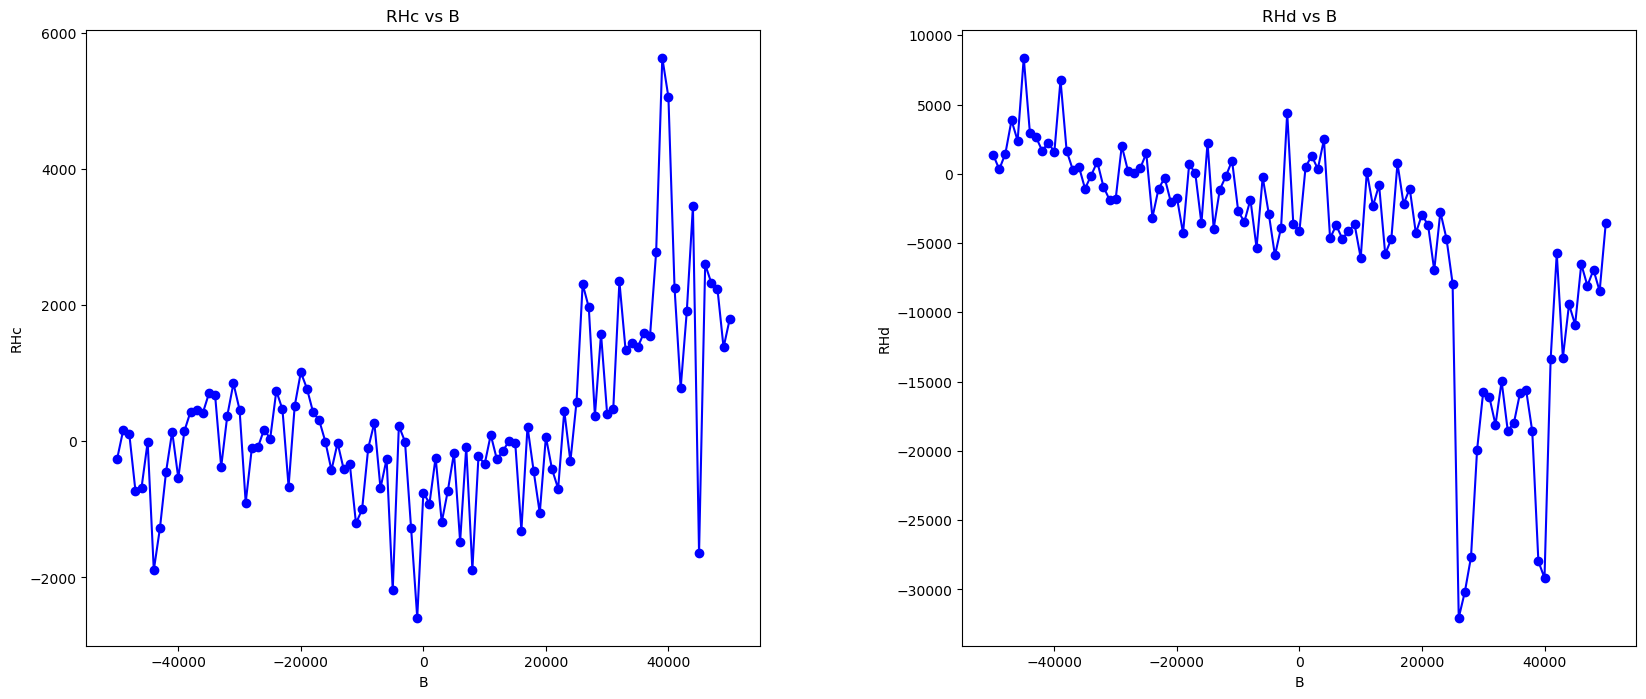

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

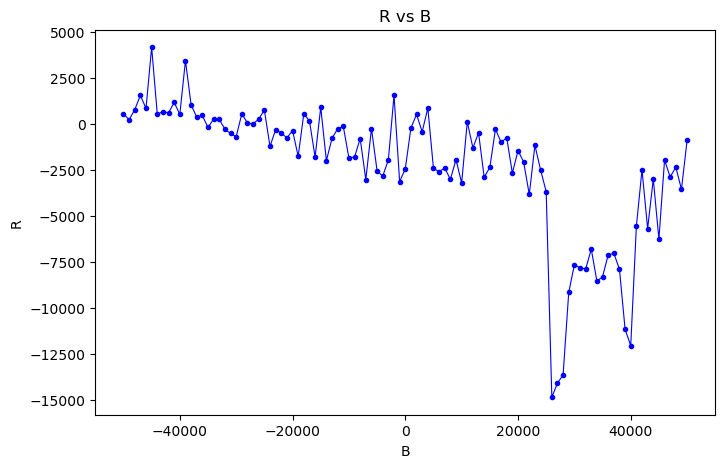

In [17]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [18]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

I      B           T           V1            V2            V3  \
0  0.000001 -50000  199.994921 -59611.01347  186086.52121  114647.06846   
1  0.000001 -49000  199.995790 -59694.80549  190249.92277  118086.76310   
2  0.000001 -48000  199.995821 -59352.37528  193980.99122  114520.89173   
3  0.000001 -47000  199.994616 -59655.95594  198470.98790  113632.23262   
4  0.000001 -46000  199.992799 -59979.79392  201924.59318  110310.75525   

             V4           V5            V6            V7            V8  \
0 -100880.04734 -57724.03023  186180.89738  113375.74708  -98594.81242   
1 -102721.48250 -58592.08667  189974.53992  112185.54810 -100150.13331   
2 -104279.26006 -56945.56440  194145.45696  110043.08366 -101825.57131   
3 -105611.07308 -57129.64577  198670.76309  107718.21822 -103447.10900   
4 -107547.92692 -56339.77587  202965.36426  105934.80360 -105404.67265   

   multiplier  
0   1000000.0  
1   1000000.0  
2   1000000.0  
3   1000000.0  
4   1000000.0

### Hall resistance calculation

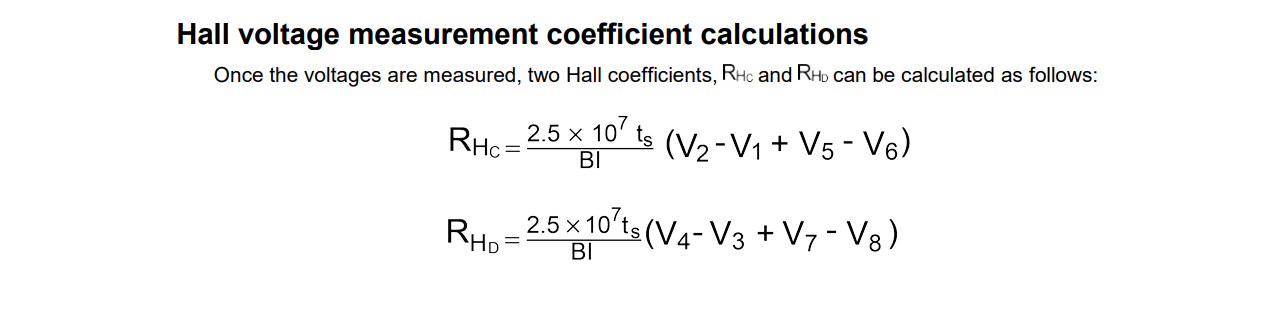

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [19]:
data2['RHc'] = (-data2['V2'] + data2['V1'] - data2['V5'] + data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (-data2['V4'] + data2['V3'] - data2['V7'] + data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

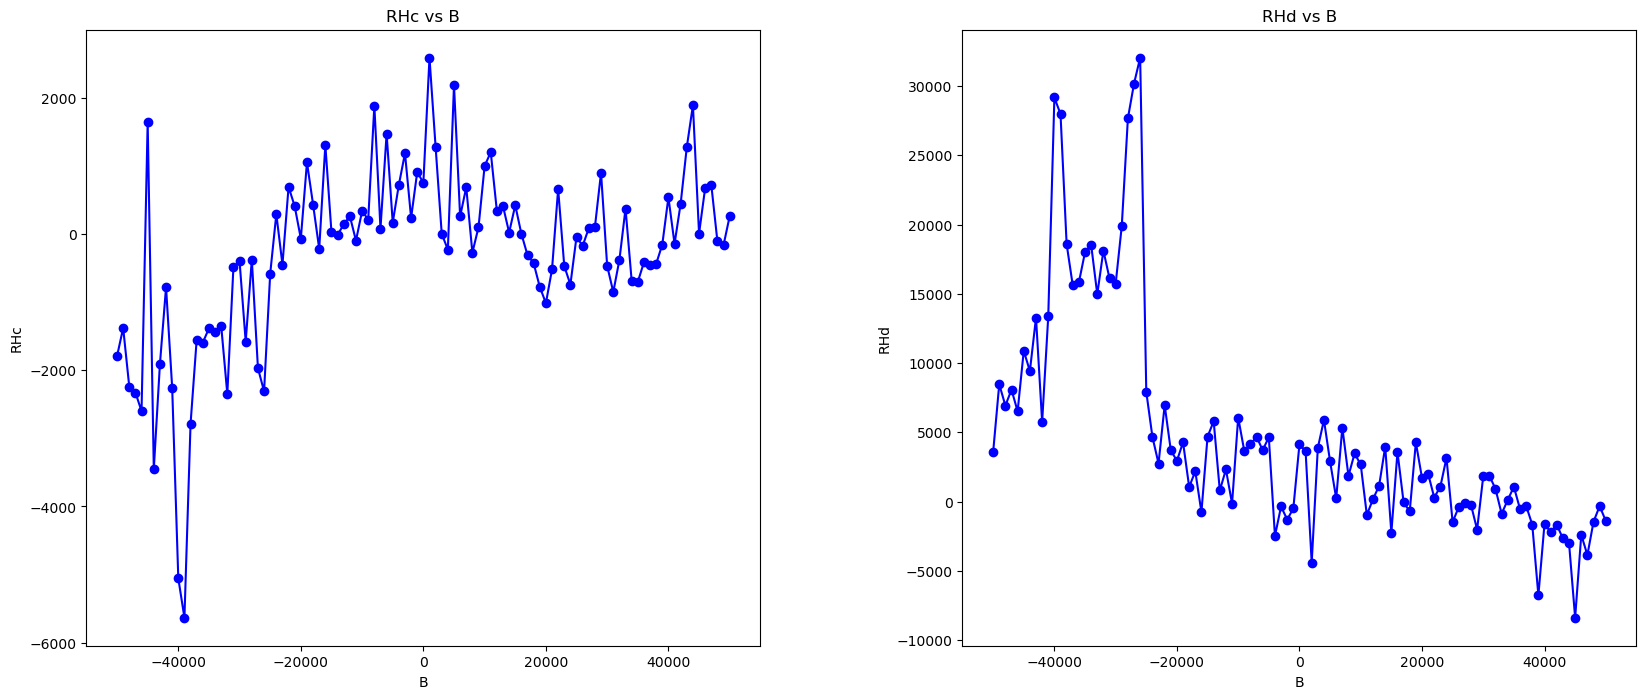

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

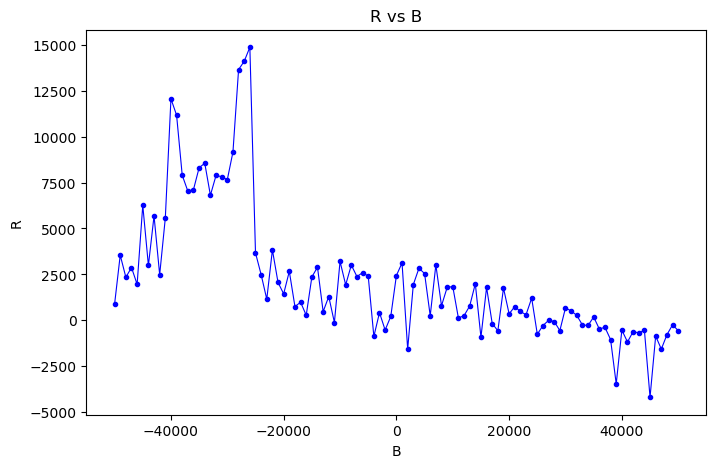

In [21]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

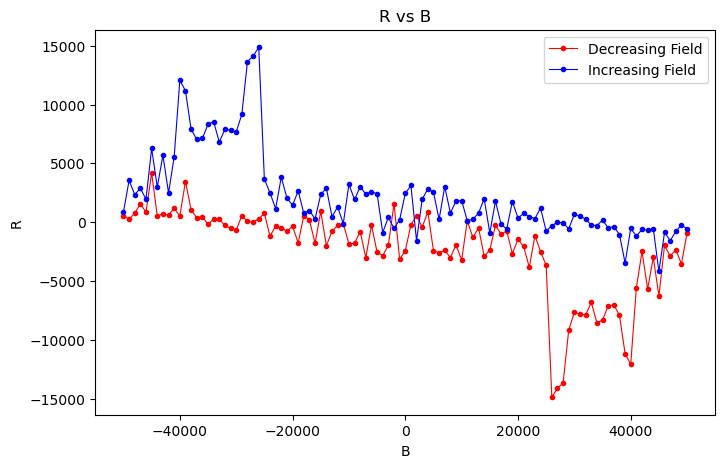

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()